In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
"""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
#from sklearn.model import train_test_split

In [ ]:
data = pd.read_csv("/kaggle/input/meta-data-intro2ml/meta_data.csv")
data.head()

,File_path,Label,Numeric_Label
0,/kaggle/input/images-intro2ml/dogs/1.jpg,dogs,0
1,/kaggle/input/images-intro2ml/dogs/2.jpg,dogs,0
2,/kaggle/input/images-intro2ml/dogs/3.jpg,dogs,0
3,/kaggle/input/images-intro2ml/dogs/4.jpg,dogs,0
4,/kaggle/input/images-intro2ml/dogs/5.jpg,dogs,0


In [ ]:
data["Numeric_Label"] = data["Numeric_Label"].astype("category")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   File_path      30000 non-null  object  
 1   Label          30000 non-null  object  
 2   Numeric_Label  30000 non-null  category
dtypes: category(1), object(2)
memory usage: 498.3+ KB


In [ ]:
data["Numeric_Label"].value_counts()

0    10000
1    10000
2    10000
Name: Numeric_Label, dtype: int64

In [ ]:
data[data["Numeric_Label"] == 1].head()
#0 ---> Dogs
#1 ---> Vehicles
#2 ---> Food

,File_path,Label,Numeric_Label
10000,/kaggle/input/images-intro2ml/vehicles/1.jpg,vehicles,1
10001,/kaggle/input/images-intro2ml/vehicles/2.jpg,vehicles,1
10002,/kaggle/input/images-intro2ml/vehicles/3.jpg,vehicles,1
10003,/kaggle/input/images-intro2ml/vehicles/4.jpg,vehicles,1
10004,/kaggle/input/images-intro2ml/vehicles/5.jpg,vehicles,1


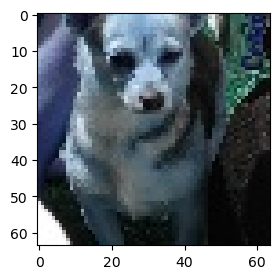

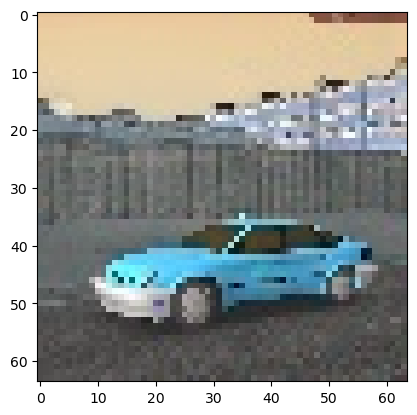

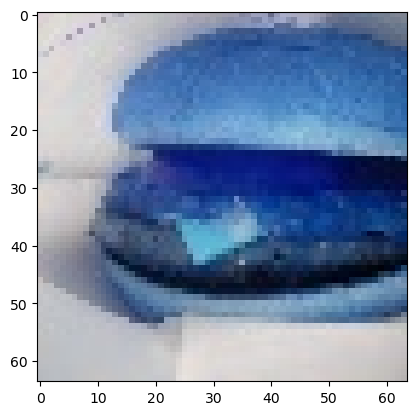

In [ ]:
plt.figure(figsize = (3,8))
#Rendering Dog
image = cv2.imread(data.iloc[3]["File_path"], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
#Rendering Car
image = cv2.imread(data.iloc[10003]["File_path"], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
#Rendering Food
image = cv2.imread(data.iloc[20003]["File_path"], cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
data = data.sample(frac = 1)
data.head()

,File_path,Label,Numeric_Label
7568,/kaggle/input/images-intro2ml/dogs/7569.jpg,dogs,0
347,/kaggle/input/images-intro2ml/dogs/348.jpg,dogs,0
29625,/kaggle/input/images-intro2ml/food/9626.jpg,food,2
2143,/kaggle/input/images-intro2ml/dogs/2144.jpg,dogs,0
22073,/kaggle/input/images-intro2ml/food/2074.jpg,food,2


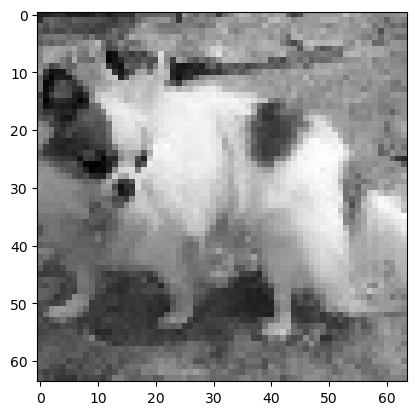

In [ ]:
image = cv2.imread(data.iloc[1]["File_path"])
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap = "gray")
plt.show()

In [ ]:
#Data Preprocessing
image_data = []
image_label = []
for i in range(0, data.shape[0]):
    image = cv2.imread(data.iloc[i]["File_path"])
    image = cv2.resize(image, (224, 224))
    image_data.append(image)
    image_label.append(data.iloc[i]["Numeric_Label"])

In [ ]:
#train-test split
x_train = image_data[:29000]
y_train = image_label[:29000]
x_test = image_data[29000:30000]
y_test = image_label[29000:30000]

In [ ]:
# Label Encoding
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
x_train = np.expand_dims(x_train, axis = 0)
x_train = np.squeeze(x_train)
y_train = to_categorical(y_train, num_classes = 3)

In [ ]:
# Importing Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

# Initializing the CNN
model = Sequential()
# Convolution Step 1 using padding as 'valid' since input shape is big
model.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))
# Max Pooling Step 1
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Convolution Step 2
model.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))
# Max Pooling Step 2
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
model.add(BatchNormalization())
# Convolution Step 3
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 4
model.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
model.add(BatchNormalization())
# Convolution Step 5
model.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))
# Max Pooling Step 3
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
model.add(BatchNormalization())
# Flattening Step
model.add(Flatten())
# Full Connection Step
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 4096, activation = 'relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
#output is 3 because of 3 classes
model.add(Dense(units = 3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                        

In [ ]:
# Compiling the Model
from keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
#defining the custom fit for neural network training
def custom_fit(model, x_train, y_train, batch_size=32, epochs=10, validation_data=None):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")
        for batch_index in range(0, len(x_train), batch_size):
            X_batch = x_train[batch_index:batch_index+batch_size]
            y_batch = y_train[batch_index:batch_index+batch_size]
            loss = model.train_on_batch(X_batch, y_batch)
            #print("Loss: " + str(loss))

In [ ]:
#model training
custom_fit(model, x_train, y_train, epochs = 40, batch_size = 100)

Epoch 1/40
Epoch 2/40
Epoch 3/40
Epoch 4/40
Epoch 5/40
Epoch 6/40
Epoch 7/40
Epoch 8/40
Epoch 9/40
Epoch 10/40
Epoch 11/40
Epoch 12/40
Epoch 13/40
Epoch 14/40
Epoch 15/40
Epoch 16/40
Epoch 17/40
Epoch 18/40
Epoch 19/40
Epoch 20/40
Epoch 21/40
Epoch 22/40
Epoch 23/40
Epoch 24/40
Epoch 25/40
Epoch 26/40
Epoch 27/40
Epoch 28/40
Epoch 29/40
Epoch 30/40
Epoch 31/40
Epoch 32/40
Epoch 33/40
Epoch 34/40
Epoch 35/40
Epoch 36/40
Epoch 37/40
Epoch 38/40
Epoch 39/40
Epoch 40/40


In [ ]:
#changing the dimensions of test dataset
x_test = np.expand_dims(x_test, axis = 0)
x_test = np.squeeze(x_test)

In [ ]:
#changing the dimensions of y_test
y_test = to_categorical(y_test, num_classes = 3)

In [ ]:
#model accuracy on test data
results = model.evaluate(x_test, y_test)

19/19 [==============================] - 1s 30ms/step - loss: 0.2388 - accuracy: 0.9567
